In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#Import Dataset
mush_data = pd.read_csv("mushrooms.csv")
mush_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
#Check missing values
mush_data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#Perform Label encoding
from collections import defaultdict
d = defaultdict(LabelEncoder)
mush_encoded = mush_data.apply(lambda x:d[x.name].fit_transform(x))

In [6]:
features = mush_encoded.columns[mush_encoded.columns != 'class']
import random
random.seed(1111)
train_data, test_data = train_test_split(mush_encoded, test_size = 0.3)

In [7]:
#Define grid parameters
param_grid ={
    'n_estimators':[10,50,100,200,300,400,500],
    'max_features':['auto','sqrt']
}

rf_model = RandomForestClassifier()

grid_model = GridSearchCV(rf_model, param_grid=param_grid , cv=5)
model = grid_model.fit(train_data[features], train_data['class'])

In [8]:
pred = model.predict(test_data[features])
model_accuracy = accuracy_score(test_data['class'], pred)
print(model_accuracy)

1.0


In [9]:
#Determine Important Variables in the model
feature_importance = pd.DataFrame(model.best_estimator_.feature_importances_, index = train_data[features].columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importance

,importance
gill-color,0.196161
spore-print-color,0.143577
ring-type,0.109815
odor,0.097276
gill-size,0.092149
population,0.081857
stalk-root,0.057979
bruises,0.049004
stalk-surface-below-ring,0.029049
habitat,0.023008


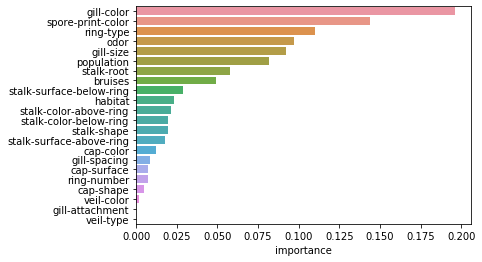

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.barplot(x=feature_importance['importance'], y=feature_importance.index)